In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [10]:
df = pd.read_csv(r"C:\Users\yashs\Downloads\python\DA Project\Task 6\WineQT.csv")
print(df.head())
print(df.info())
print(df.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [11]:
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


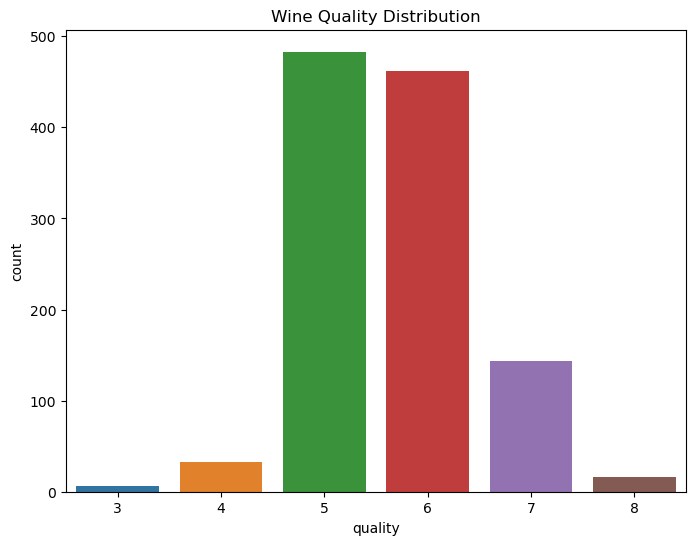

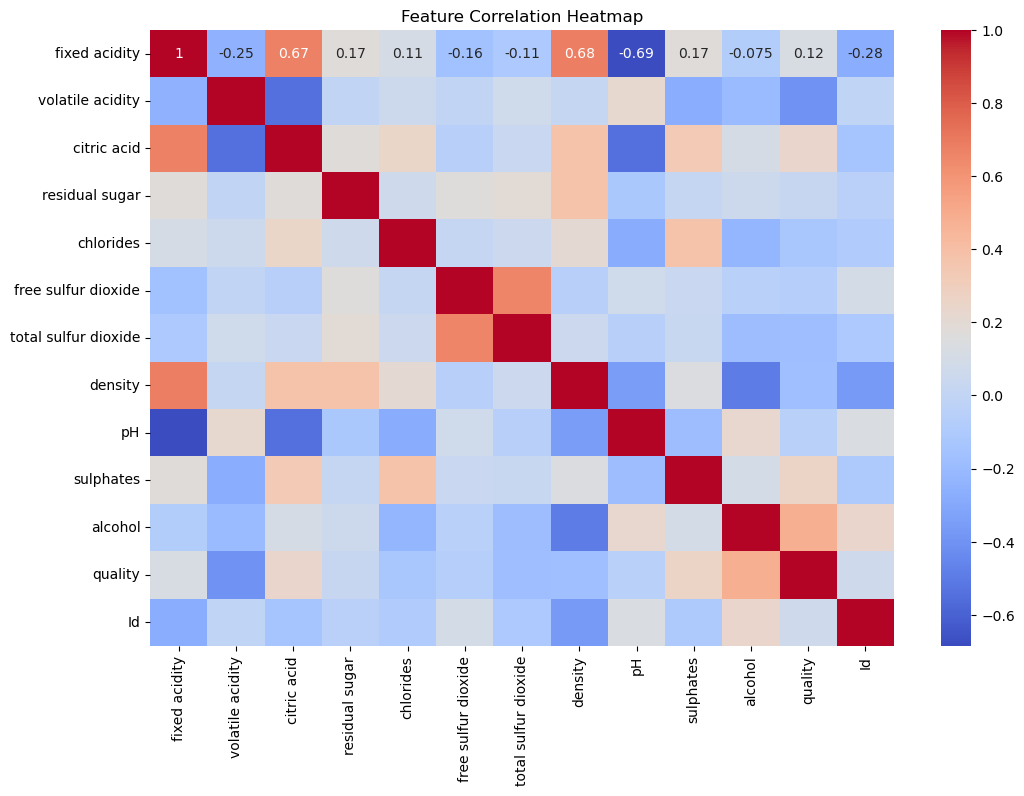

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df)
plt.title('Wine Quality Distribution')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [13]:
# Drop 'Id' column if it exists
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

# Features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [15]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)


In [16]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)


In [17]:
def evaluate(name, y_true, y_pred):
    print(f"----{name}----")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate("Random Forest", y_test, rf_pred)
evaluate("SGD", y_test, sgd_pred)
evaluate("SVC", y_test, svc_pred)


----Random Forest----
Accuracy: 0.6855895196506551
Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 76 19  1  0]
 [ 0 26 66  7  0]
 [ 0  0 11 15  0]
 [ 0  0  2  0  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.79      0.76        96
           6       0.65      0.67      0.66        99
           7       0.65      0.58      0.61        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.41      0.41       229
weighted avg       0.66      0.69      0.67       229

----SGD----
Accuracy: 0.5851528384279476
Confusion Matrix:
 [[ 0  0  0  0  0  0]
 [ 0  0  3  3  0  0]
 [ 1  5 68 19  3  0]
 [ 0  3 30 57  9  0]
 [ 0  0  1 16  9  0]
 [ 0  0  0  1  1  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
      

C:\Users\yashs\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashs\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashs\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashs\anaconda\Lib\site-packages\sklearn\metrics\